In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
files = {
    "clean": "datasets/Clean_Dataset.csv",
    "business": "datasets/business.csv",
    "economy": "datasets/economy.csv"
}

dfs = {name: pd.read_csv(path) for name, path in files.items()}

df_clean = dfs["clean"]
df_business = dfs["business"]
df_economy = dfs["economy"]

for name, df in dfs.items():
    print(f"\n{name.upper()}")
    print(df.head())


CLEAN
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  

BUSINESS
         date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delh

In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df_clean.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df_clean.duplicated().sum()

np.int64(0)

In [6]:
df_clean.drop(["Unnamed: 0", "flight"], axis=1, inplace=True)

In [7]:
df_clean.describe(include='object')

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153
unique,6,6,6,3,6,6,2
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,61343,71146,250863,91538,59097,206666


cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
for col in cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

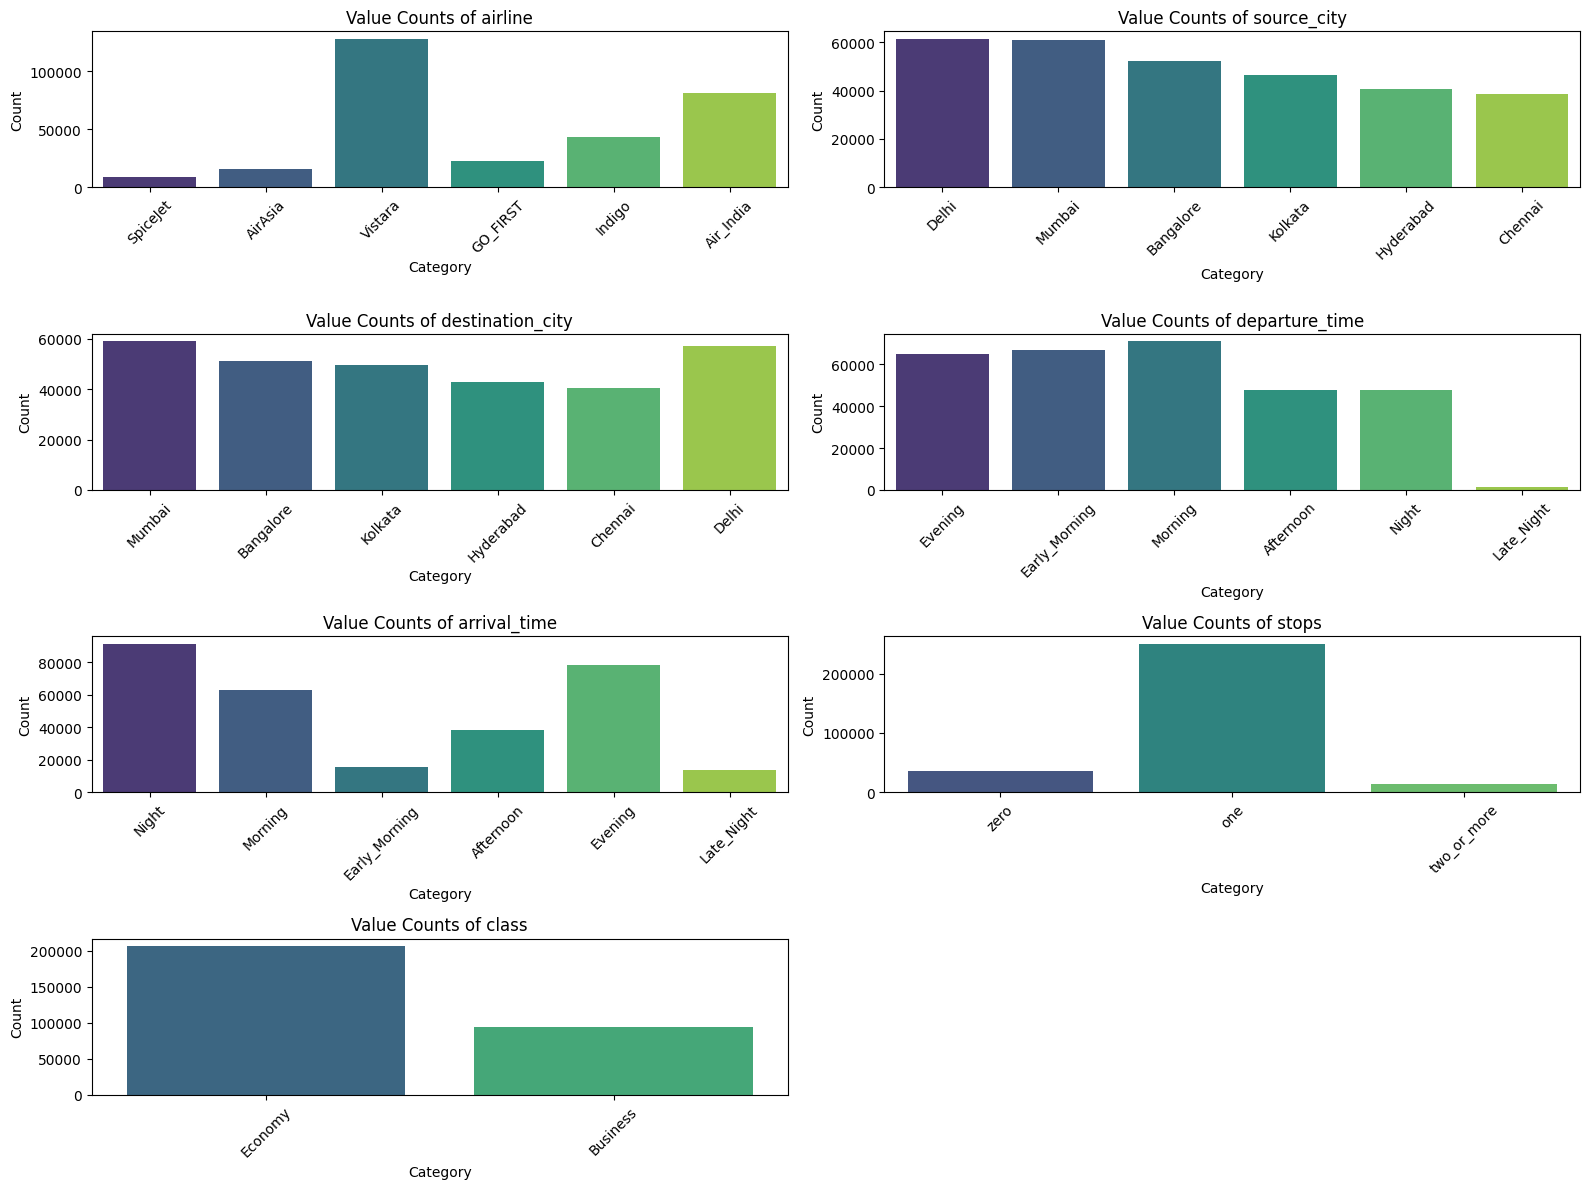

In [8]:
cols = ['airline', 'source_city', 'destination_city', 
        'departure_time', 'arrival_time', 'stops', 'class']

n = len(cols)
rows = math.ceil(n/2) 
fig, axes = plt.subplots(rows, 2, figsize=(16, rows*3))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(
        data=df_clean,
        x=col,
        hue=col,      
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f"Value Counts of {col}")
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxplots_count.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
cols = ['airline', 'source_city', 'destination_city',
        'departure_time', 'arrival_time', 'stops', 'class']

n_cols = 2
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(
        data=df_clean,
        x=col,
        y='price',
        hue=col,
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f"Price vs {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxplots_price.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

In [ ]:
cols = ['airline', 'source_city', 'destination_city',
            'departure_time', 'arrival_time', 'stops', 'class']

for col, le in label_encoders.items():
    print(f"=== {col} ===")
    mapping = {category: idx for idx, category in enumerate(le.classes_)}
    print(mapping)

In [ ]:
df_clean.head()

In [ ]:
numeric_df = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.savefig(f"heatmap_{col}.png", dpi=300, bbox_inches='tight')
plt.show()